**In this notebook we perform exploratory data analysis on the articles.csv file present in the H&M Personalized Fashion Recommendations dataset on Kaggle.**

In [368]:
# from gitly.colab.plot import GitlyPlotter
import gitly
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from PIL import Image
import os 

# Loading the Dataset

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [369]:
# articles=pd.read_csv('/content/drive/My Drive/articles.csv')
articles = pd.read_csv('articles.csv')

In [370]:
articles

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105537,953450001,953450,5pk regular Placement1,302,Socks,Socks & Tights,1010014,Placement print,9,Black,...,Socks Bin,F,Menswear,3,Menswear,26,Men Underwear,1021,Socks and Tights,Socks in a fine-knit cotton blend with a small...
105538,953763001,953763,SPORT Malaga tank,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,2,H&M+,1005,Jersey Fancy,Loose-fitting sports vest top in ribbed fast-d...
105539,956217002,956217,Cartwheel dress,265,Dress,Garment Full body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,18,Womens Trend,1005,Jersey Fancy,"Short, A-line dress in jersey with a round nec..."
105540,957375001,957375,CLAIRE HAIR CLAW,72,Hair clip,Accessories,1010016,Solid,9,Black,...,Small Accessories,D,Divided,2,Divided,52,Divided Accessories,1019,Accessories,Large plastic hair claw.


# EDA and Data Preprocessing

## Column - product_group_name

We are only interested in the article id and names associated with the articles. So we dropped other number and code columns.

In [371]:
remove_cols=['product_code','product_type_no','graphical_appearance_no','colour_group_code','index_code','index_group_no',
             'section_no','garment_group_no','perceived_colour_value_id','perceived_colour_value_name','perceived_colour_master_name',
             'perceived_colour_master_id','department_no']
articles=articles.drop(remove_cols,axis=1)

Converting the article id datatype into string. By default it gets read as an integer which removes the first '0' digit so adding that as well.

In [372]:
articles['article_id'] = articles['article_id'].astype(str)
articles['article_id']=["0"+x for x in articles['article_id']]

The dataset contains non-clothing articles as well. We only want to include specific clothing articles. Studying the distribution of product groups helps in determining which groups to include.

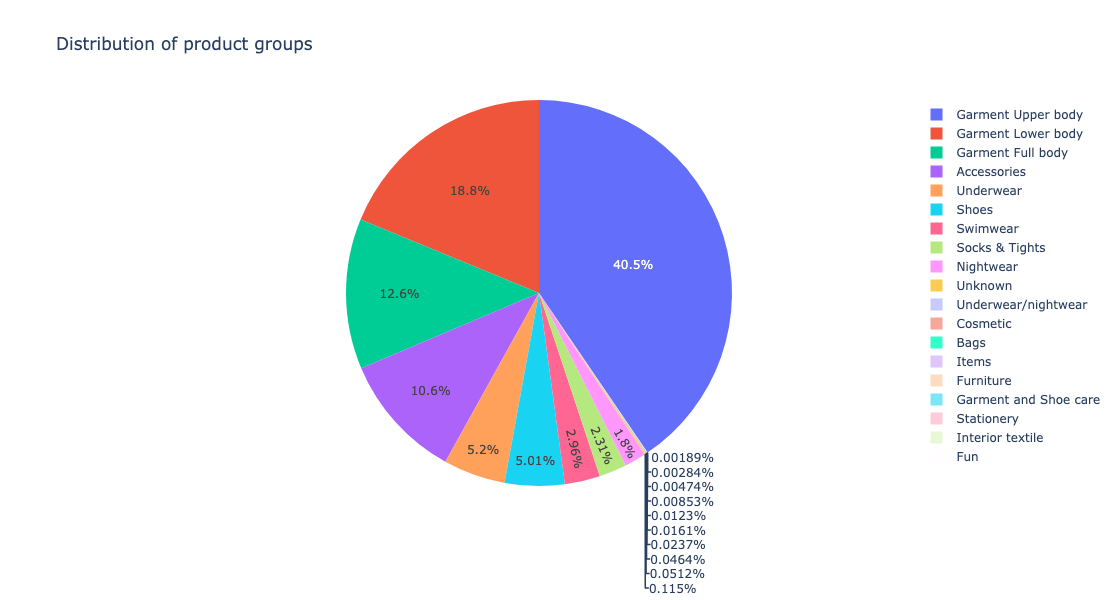

In [373]:
# if your running this on local system
fig = px.pie(articles, values=articles['product_group_name'].value_counts().values,names=articles['product_group_name'].value_counts().index, title='Distribution of product groups')
fig.update_layout(width=800, height=600)

In [9]:
# if running on colab
gitly = GitlyPlotter('github')
fig = px.pie(articles, values=articles['product_group_name'].value_counts().values,
             names=articles['product_group_name'].value_counts().index, title='Distribution of product groups')

gitly.show(fig, height = 700,  width = 800, scale = 1 )

In [374]:
articles.loc[articles['product_group_name']== 'Socks & Tights','product_type_name'].value_counts()

product_type_name
Socks               1889
Underwear Tights     546
Leg warmers            7
Name: count, dtype: int64

In [375]:
articles.loc[articles['product_group_name']== 'Nightwear','product_type_name'].value_counts()

product_type_name
Pyjama set                  1120
Pyjama jumpsuit/playsuit     388
Pyjama bottom                220
Night gown                   171
Name: count, dtype: int64

we can conclude that we can drop 'Socks & Tights' and nightwear

We selected product groups as mentioned below. The percentage of articles categorized into 'Unknown' product group is significant. We decided to include it for further analysis.

In [376]:
product_groups_list=['Garment Upper body','Garment Lower body','Garment Full body','Shoes','Swimwear','Unknown']
selected_articles = articles.loc[articles['product_group_name'].isin(product_groups_list)].reset_index()
selected_articles.drop(columns=['index'],axis= 1,inplace=True)

In [377]:
selected_articles

,article_id,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc
0,0108775015,Strap top,Vest top,Garment Upper body,Solid,Black,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.
1,0108775044,Strap top,Vest top,Garment Upper body,Solid,White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.
2,0108775051,Strap top (1),Vest top,Garment Upper body,Stripe,Off White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.
3,0111586001,Shape Up 30 den 1p Tights,Leggings/Tights,Garment Lower body,Solid,Black,Tights basic,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights,Tights with built-in support to lift the botto...
4,0112679048,SWEATSHIRT OC,Sweater,Garment Upper body,All over pattern,Grey,Baby basics,Baby Sizes 50-98,Baby/Children,Baby Essentials & Complements,Jersey Basic,Sweatshirt in soft organic cotton with a pres...
...,...,...,...,...,...,...,...,...,...,...,...,...
84371,0952937003,Jets dress,Dress,Garment Full body,All over pattern,Beige,Jersey,Ladieswear,Ladieswear,Womens Trend,Jersey Fancy,"Fitted, calf-length dress in viscose jersey wi..."
84372,0952938001,Elton top,Top,Garment Upper body,All over pattern,Beige,Jersey,Ladieswear,Ladieswear,Womens Trend,Jersey Fancy,Fitted top in jersey with a round neckline and...
84373,0953763001,SPORT Malaga tank,Vest top,Garment Upper body,Solid,Black,Jersey,Ladieswear,Ladieswear,H&M+,Jersey Fancy,Loose-fitting sports vest top in ribbed fast-d...
84374,0956217002,Cartwheel dress,Dress,Garment Full body,Solid,Black,Jersey,Ladieswear,Ladieswear,Womens Trend,Jersey Fancy,"Short, A-line dress in jersey with a round nec..."


## Column - index_group_name

In [378]:
pd.DataFrame(selected_articles[['index_group_name', 'index_name']].value_counts()).sort_values(by='index_group_name')

count
index_group_name index_name                           
Baby/Children    Children Sizes 92-140           10666
                 Children Sizes 134-170           8152
                 Baby Sizes 50-98                 6999
                 Children Accessories, Swimwear   2621
Divided          Divided                         13376
Ladieswear       Ladieswear                      25532
                 Ladies Accessories               2044
                 Lingeries/Tights                 1938
Menswear         Menswear                        10275
Sport            Sport                            2773

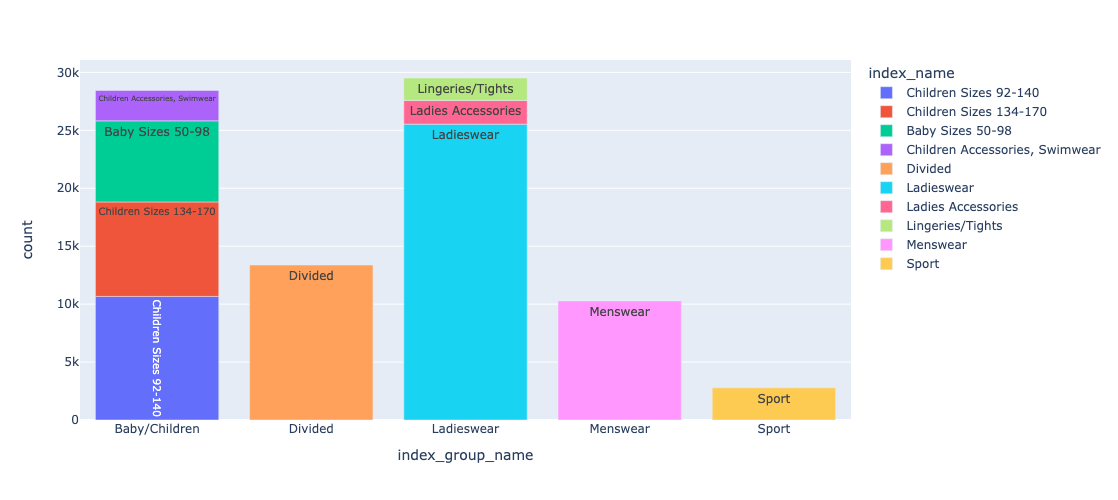

In [403]:
vis_df = pd.DataFrame(selected_articles[['index_group_name', 'index_name']].value_counts()).reset_index().sort_values(by = 'index_group_name')
fig = px.bar(vis_df,x = 'index_group_name', color="index_name",y= 'count',  text = 'index_name',width=1100, height=500)

fig.show()

from above we can differentiate clothing sections. we are not interested in Baby/Children section, so we can drop that. Also we need to further investigate Divided section and Ladies Accessories & Lingeries/Tights in Ladieswear and also sports.

### index_group_name - Divided

In [20]:
selected_articles.loc[selected_articles['index_group_name'] == 'Divided']

,article_id,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc
57,0181160009,Eva chelsea boot,Boots,Shoes,Solid,Yellowish Brown,Divided Shoes,Divided,Divided,Divided Accessories,Shoes,Chelsea boots with elasticated gores in the si...
79,0189616001,Tina leggings,Leggings/Tights,Garment Lower body,Solid,Black,Basic 1,Divided,Divided,Divided Basics,Jersey Basic,Leggings in extra sturdy jersey with an elasti...
80,0189616006,Heavy jsy long leg,Leggings/Tights,Garment Lower body,Contrast,Black,Basic 1,Divided,Divided,Divided Basics,Jersey Basic,Leggings in extra sturdy jersey with an elasti...
81,0189616007,Heavy jsy long leg,Leggings/Tights,Garment Lower body,Contrast,Black,Basic 1,Divided,Divided,Divided Basics,Jersey Basic,Leggings in extra sturdy jersey with an elasti...
82,0189616008,Heavy jsy long leg,Leggings/Tights,Garment Lower body,Contrast,Black,Basic 1,Divided,Divided,Divided Basics,Jersey Basic,Leggings in extra sturdy jersey with an elasti...
...,...,...,...,...,...,...,...,...,...,...,...,...
84345,0945995002,Tank sweater Fast buy,Sweater,Garment Upper body,All over pattern,Light Pink,Tops Fancy Jersey,Divided,Divided,Divided Collection,Jersey Fancy,Straight-style top in lightweight sweatshirt f...
84346,0946095001,MARSH W DRESS,Dress,Garment Full body,Check,Dark Red,Dresses,Divided,Divided,Divided Collection,Dresses Ladies,"Short, A-line dress in cotton flannel with a d..."
84348,0946387001,DIV+ Marsh dress W,Dress,Garment Full body,Check,Dark Red,Divided+,Divided,Divided,Divided Projects,Unknown,"Short, A-line dress in cotton flannel with a d..."
84368,0949551001,Virgo sweater fast buy,Sweater,Garment Upper body,Solid,Black,Tops Fancy Jersey,Divided,Divided,Divided Collection,Jersey Fancy,"Short, boxy-style top in sweatshirt fabric mad..."


In [21]:
selected_articles.loc[selected_articles['index_group_name'] == 'Divided','section_name'].value_counts()

section_name
Divided Collection           7124
Divided Projects             2345
Divided Basics               1430
Divided Selected              991
Ladies Denim                  874
Divided Accessories           277
Divided Asia keys             275
Divided Complements Other      34
EQ Divided                     26
Name: count, dtype: int64

In [22]:
pd.DataFrame(selected_articles.loc[selected_articles['index_group_name'] == 'Divided', ['section_name','garment_group_name']].value_counts()).sort_values(by = 'section_name')

count
section_name              garment_group_name       
Divided Accessories       Accessories             2
                          Shoes                 275
Divided Asia keys         Knitwear               28
                          Special Offers         28
                          Jersey Fancy           42
                          Dresses Ladies         87
                          Trousers               90
Divided Basics            Jersey Basic         1354
                          Swimwear               76
Divided Collection        Jersey Fancy         1429
                          Shorts                256
                          Dresses Ladies       1354
                          Knitwear             1115
                          Blouses              1007
                          Outdoor               667
                          Skirts                489
                          Trousers              807
Divided Complements Other Shoes                   2
                          Trousers Denim          5
                          Jersey Basic           27
Divided Projects          Unknown               748
                          Jersey Fancy          388
                          Trousers              272
                          Dresses Ladies        554
                          Blouses               287
                          Special Offers         96
Divided Selected          Outdoor               103
                          Knitwear              153
                          Blouses                52
                          Jersey Fancy          269
                          Skirts                 39
                          Dresses Ladies        272
                          Shorts                 19
                          Trousers               84
EQ Divided                Trousers               26
Ladies Denim              Trousers Denim        874

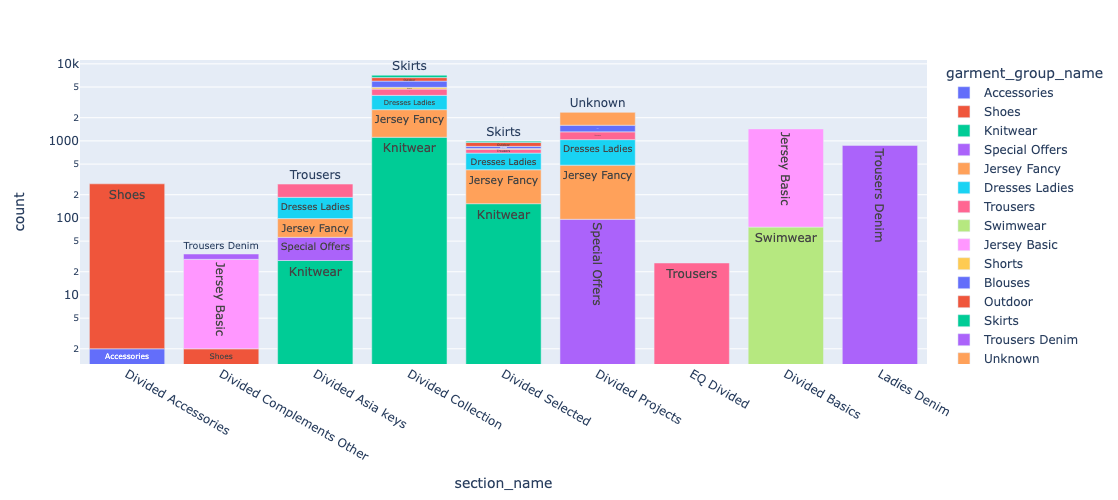

In [408]:
vis_df = pd.DataFrame(selected_articles.loc[selected_articles['index_group_name'] == 'Divided', ['section_name','garment_group_name']].value_counts()).sort_values(by = 'section_name').reset_index().sort_values(by = 'section_name')
fig = px.bar(vis_df,x = 'section_name', color="garment_group_name",y= 'count',  text = 'garment_group_name',width=1100, height=500, log_y= True)
fig.show()

from above we can further check what is 'Unknown', 'Special Offers' and 'Accessories'

In [23]:
selected_articles.loc[(selected_articles['index_group_name'] == 'Divided') & (selected_articles['garment_group_name'] == 'Special Offers')]

,article_id,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc
2624,0477970001,AK Tilda skirt,Skirt,Garment Lower body,Solid,Light Pink,Promotion/ Other /Offer,Divided,Divided,Divided Projects,Special Offers,Calf-length mesh skirt. Unlined.
3370,0496931002,FIB Christy Cropped Tank,Vest top,Garment Upper body,Placement print,Light Pink,Promotion/ Other /Offer,Divided,Divided,Divided Projects,Special Offers,Cropped vest top in organic cotton jersey with...
3371,0496931003,FIB Christy Cropped Tank,Vest top,Garment Upper body,Placement print,Black,Promotion/ Other /Offer,Divided,Divided,Divided Projects,Special Offers,Cropped vest top in organic cotton jersey with...
5268,0517795001,HW Muerte Catsuit,Jumpsuit/Playsuit,Garment Full body,Front print,Black,Promotion/ Other /Offer,Divided,Divided,Divided Projects,Special Offers,Fancy dress costume in printed jersey with lon...
8876,0553503001,Monty hood,Hoodie,Garment Upper body,Front print,Black,Promotion/ Other /Offer,Divided,Divided,Divided Projects,Special Offers,ACE TEE x H&M. Top in scuba fabric with a jers...
...,...,...,...,...,...,...,...,...,...,...,...,...
83282,0918111004,LOVE Cropped tank price.,Vest top,Garment Upper body,Placement print,Beige,Promotion/ Other /Offer,Divided,Divided,Divided Projects,Special Offers,Cropped sleeveless top in cotton jersey with a...
84064,0931282001,Aussie Mabel HW Jogger,Trousers,Garment Lower body,Placement print,Black,Promotion/ Other /Offer,Divided,Divided,Divided Projects,Special Offers,Kangol x H&M. Joggers in sweatshirt fabric mad...
84068,0931335001,Aussie Mabel Shaka dress,Dress,Garment Full body,Placement print,Black,Promotion/ Other /Offer,Divided,Divided,Divided Projects,Special Offers,"Kangol x H&M. Short, fitted dress in jersey ma..."
84157,0933909001,HW Circus body,Bodysuit,Garment Upper body,Mixed solid/pattern,Red,Promotion/ Other /Offer,Divided,Divided,Divided Projects,Special Offers,"Long-sleeved, fancy dress body in soft velour ..."


In [24]:
selected_articles.loc[(selected_articles['index_group_name'] == 'Divided') & (selected_articles['garment_group_name'] == 'Unknown')]

,article_id,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc
8158,0548549001,EQ Sugar dress,Dress,Garment Full body,Solid,Black,Equatorial,Divided,Divided,Divided Projects,Unknown,"Short, fitted dress in sturdy jersey in a stra..."
8159,0548551004,EQ Washington dress,Dress,Garment Full body,Solid,Dark Red,Equatorial,Divided,Divided,Divided Projects,Unknown,"Short, sleeveless, jacquard-patterned jersey d..."
8160,0548553004,EQ Boar tank,Vest top,Garment Upper body,All over pattern,Grey,Divided+,Divided,Divided,Divided Projects,Unknown,Vest top in printed cotton jersey.
8161,0548556001,EQ Nicky knot tank,Vest top,Garment Upper body,Front print,White,Divided+,Divided,Divided,Divided Projects,Unknown,Jersey vest top in a soft cotton blend with a ...
8162,0548556003,EQ Nicky knot tank,Vest top,Garment Upper body,Front print,Black,Divided+,Divided,Divided,Divided Projects,Unknown,Jersey vest top in a soft cotton blend with a ...
...,...,...,...,...,...,...,...,...,...,...,...,...
84192,0935464001,DIV+ Fancy pant,Trousers,Garment Lower body,Check,Black,Divided+,Divided,Divided,Divided Projects,Unknown,Ankle-length trousers in sturdy jersey with an...
84196,0935541001,Aussi Leaf midi dress,Dress,Garment Full body,Solid,Black,Price Items,Divided,Divided,Divided Projects,Unknown,"Kangol x H&M. Fitted, calf-length dress in sof..."
84217,0935858001,Piper sweatshirt,Sweater,Garment Upper body,Solid,Black,Price Items,Divided,Divided,Divided Projects,Unknown,"Top in soft sweatshirt fabric with a rounded, ..."
84218,0935858002,Piper sweatshirt,Sweater,Garment Upper body,Solid,Light Beige,Price Items,Divided,Divided,Divided Projects,Unknown,"Top in soft sweatshirt fabric with a rounded, ..."


In [34]:
selected_articles.loc[(selected_articles['index_group_name'] == 'Divided') & (selected_articles['garment_group_name'] == 'Special Offers'), 'product_type_name'].value_counts()

product_type_name
Dress                30
T-shirt              15
Shorts               10
Jumpsuit/Playsuit     9
Blouse                9
Trousers              7
Bodysuit              7
Skirt                 6
Vest top              6
Hoodie                6
Jacket                6
Top                   5
Sweater               5
Shirt                 2
Cardigan              1
Name: count, dtype: int64

In [25]:
selected_articles.loc[(selected_articles['index_group_name'] == 'Divided') & (selected_articles['garment_group_name'] == 'Accessories')]

,article_id,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc
38224,0691704002,VEGA STRAW HAT,Unknown,Unknown,Solid,Beige,Knit & Woven,Divided,Divided,Divided Accessories,Accessories,Hat in paper straw with a grosgrain band. Widt...
80863,0894221001,MAJSAN SMALL BAG,Unknown,Unknown,Solid,Black,Bags,Divided,Divided,Divided Accessories,Accessories,Shoulder bag in quilted imitation leather with...


Therefore we can drop 'Accessories', While 'Unknown' & 'Special Offers' can be kept

### index_group_name - Ladieswear

##### Ladies Accessories

In [37]:
selected_articles.loc[(selected_articles['index_group_name'] =='Ladieswear') & (selected_articles['index_name']== 'Ladies Accessories')]

,article_id,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc
743,0349301001,GLASSIG ESPADRILLE,Ballerinas,Shoes,Solid,Black,Flats,Ladies Accessories,Ladieswear,Womens Shoes,Shoes,Espadrilles in cotton with a braided jute trim...
748,0349301022,GLASSIG ESPADRILLE,Ballerinas,Shoes,Solid,Red,Flats,Ladies Accessories,Ladieswear,Womens Shoes,Shoes,Espadrilles in cotton with a braided jute trim...
750,0349301024,GLASSIG ESPADRILLE,Ballerinas,Shoes,Solid,Pink,Flats,Ladies Accessories,Ladieswear,Womens Shoes,Shoes,Espadrilles in cotton with a braided jute trim...
751,0349301025,GLASSIG ESPADRILLE,Ballerinas,Shoes,Solid,White,Flats,Ladies Accessories,Ladieswear,Womens Shoes,Shoes,Espadrilles in cotton with a braided jute trim...
752,0349301028,GLASSIG ESPADRILLE,Ballerinas,Shoes,All over pattern,Dark Blue,Flats,Ladies Accessories,Ladieswear,Womens Shoes,Shoes,Espadrilles in cotton with a braided jute trim...
...,...,...,...,...,...,...,...,...,...,...,...,...
84075,0931696001,Dickens boot,Boots,Shoes,Solid,Dark Orange,Boots,Ladies Accessories,Ladieswear,Womens Shoes,Shoes,Platform ankle boots in imitation leather with...
84251,0937249001,Sandell chelsea boot,Boots,Shoes,Solid,Black,Premium Quality,Ladies Accessories,Ladieswear,Womens Shoes,Shoes,Chisel-toed boots in soft leather with elastic...
84252,0937252001,Sandell stretch boot PQ,Boots,Shoes,Solid,Black,Premium Quality,Ladies Accessories,Ladieswear,Womens Shoes,Shoes,Boots in leather with a soft shaft and square ...
84271,0938190001,Ivring PQ chelsea boot,Boots,Shoes,Solid,Dark Orange,Premium Quality,Ladies Accessories,Ladieswear,Womens Shoes,Shoes,High profile Chelsea boots in soft leather wit...


    from above dataframe, it seems most of them are shoes. we need to explore more to find it out

In [41]:
pd.DataFrame(selected_articles.loc[(selected_articles['index_group_name'] =='Ladieswear') & (selected_articles['index_name']== 'Ladies Accessories'),['product_group_name','section_name','garment_group_name','prod_name']].value_counts())

count
product_group_name section_name garment_group_name prod_name                    
Shoes              Womens Shoes Shoes              Mimmi new                  15
                                                   GLASSIG ESPADRILLE         14
                                                   Zenit highlift sneaker     13
                                                   Alma Sneaker               12
                                                   Rhea pump                  12
...                                                                          ...
                                                   OL BARACK PQ Semi-Boot      1
                                                   Elson                       1
                                                   Elsa PQ espadrille          1
                                                   OL BLIXTEN PQ sneaker       1
                                                   Majken fancy loafer         1

[1088 rows x 1 columns]

    All of them are shoes, so we can the whole Ladies Accessories

##### Lingeries/Tights 

In [44]:
selected_articles.loc[(selected_articles['index_group_name'] =='Ladieswear') & (selected_articles['index_name']== 'Lingeries/Tights')]

,article_id,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc
3,0111586001,Shape Up 30 den 1p Tights,Leggings/Tights,Garment Lower body,Solid,Black,Tights basic,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights,Tights with built-in support to lift the botto...
18,0123173001,Control Top 50 den 1p Tights,Leggings/Tights,Garment Lower body,Solid,Black,Tights basic,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights,50 denier tights with reinforcement at the top...
31,0146730001,200 den 1p leggings,Leggings/Tights,Garment Lower body,Solid,Black,Tights basic,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights,Opaque matt leggings with an elasticated waist...
33,0148033001,Nouvelle 1p Stay Up,Leggings/Tights,Garment Lower body,Solid,Black,Tights basic,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights,Semi shiny stay-ups with a wide lace trim at t...
36,0156224002,Box 4p Socks,Unknown,Unknown,Solid,Black,Tights basic,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights,Semi-matte socks with a short shaft. 20 denier.
...,...,...,...,...,...,...,...,...,...,...,...,...
83878,0926938001,Seamless Leggings Plain,Leggings/Tights,Garment Lower body,Solid,Black,Tights basic,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights,High-waisted leggings in jersey with a wide wa...
84076,0931720001,Fake legging NEW FIT,Leggings/Tights,Garment Lower body,Solid,Black,Tights basic,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights,Leggings in imitation leather jersey with an e...
84116,0932798001,Biker shorts rib,Leggings/Tights,Garment Lower body,Solid,Black,Tights basic,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights,Biker shorts in ribbed jersey designed with th...
84117,0932798002,Biker shorts rib,Leggings/Tights,Garment Lower body,Solid,Beige,Tights basic,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights,Biker shorts in ribbed jersey designed with th...


In [52]:
pd.DataFrame(selected_articles.loc[(selected_articles['index_group_name'] =='Ladieswear') & (selected_articles['index_name']== 'Lingeries/Tights'),['section_name','garment_group_name','product_type_name']].value_counts()).sort_values(by =['section_name'])

count
section_name                   garment_group_name product_type_name       
Womens Lingerie                Under-, Nightwear  Unknown               39
                                                  Swimsuit               3
                                                  Bikini top             2
                                                  Slippers               2
                                                  Swimwear bottom        1
Womens Nightwear, Socks & Tigh Socks and Tights   Leggings/Tights       41
                                                  Slippers              33
                                                  Unknown                3
Womens Swimwear, beachwear     Swimwear           Bikini top           766
                                                  Swimwear bottom      697
                                                  Swimsuit             279
                                                  Sarong                61
                                                  Swimwear set           7
                                                  Dress                  2
                                                  Top                    2

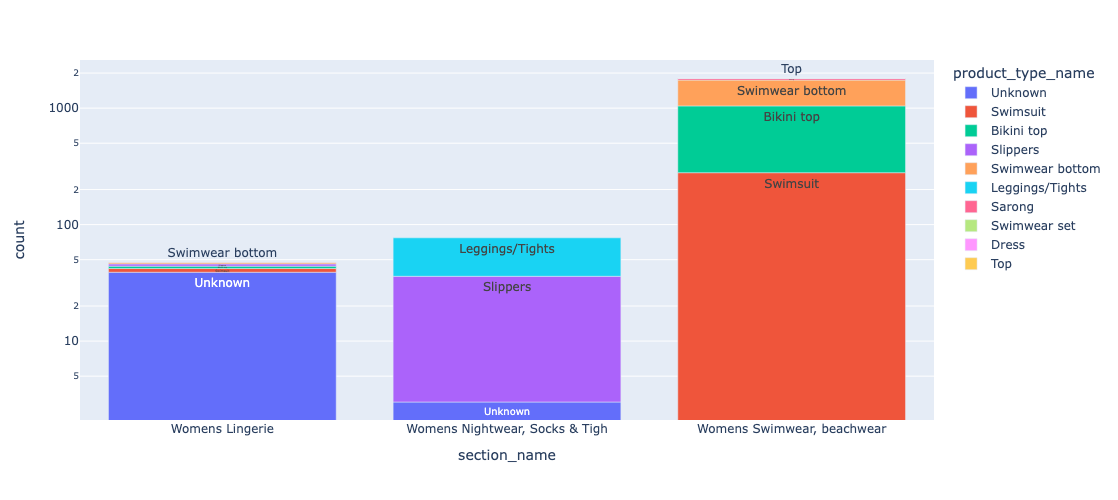

In [412]:
vis_df = pd.DataFrame(selected_articles.loc[(selected_articles['index_group_name'] =='Ladieswear') & (selected_articles['index_name']== 'Lingeries/Tights'),['section_name','garment_group_name','product_type_name']].value_counts()).reset_index().sort_values(by =['section_name'])
fig = px.bar(vis_df,x = 'section_name', color="product_type_name",y= 'count',  text = 'product_type_name',width=1100, height=500, log_y= True)
fig.show()

    from above we can ignore unknows as we would be dealing with unknowns in product_type_name in next step. 

In [58]:
selected_articles.loc[(selected_articles['index_group_name'] =='Ladieswear') & 
        (selected_articles['index_name']== 'Lingeries/Tights') & 
        (selected_articles['section_name']== 'Womens Lingerie') & 
        (selected_articles['garment_group_name'] == 'Under-, Nightwear') & 
        (selected_articles['product_type_name'] == 'Swimsuit')]

,article_id,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc
26736,0640562001,Tainted love swimsuit,Swimsuit,Swimwear,Solid,Red,Functional Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear",Fully lined swimsuit with lightly padded cups ...
66106,0811603001,CTH Beach Swimsuit,Swimsuit,Swimwear,Solid,Black,Functional Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear",Fully lined swimsuit with a lightly draped fro...
80896,0894535001,Prothesis swimsuit,Swimsuit,Swimwear,Solid,Black,Functional Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Fully lined, low-cut swimsuit with adjustable ..."


In [115]:
## Function to plot images of the outfit on console

def print_img(img_path = None, indx = None):
    if img_path == None:
        img_path = selected_articles['article_id'][indx]
        img_name = selected_articles['product_type_name'][indx]
        
    folder = img_path[0:3]
    path_to_img = '/Users/nikhilkudupudi/Projects - School & Work/Capstone/images/' + folder +'/'+ img_path +'.jpg'
    if os.path.exists(path_to_img):
        with Image.open(path_to_img) as img:
            print(img_name)
            plt.imshow(img)

    return None

In [141]:
selected_articles.loc[(selected_articles['index_group_name'] =='Ladieswear') & 
        (selected_articles['index_name']== 'Lingeries/Tights') & 
        (selected_articles['section_name']== 'Womens Lingerie') & 
        (selected_articles['garment_group_name'] == 'Under-, Nightwear') & 
        (selected_articles['product_type_name'].isin(['Swimsuit','Bikini top','Slippers','Swimwear bottom']))]

# Focusing on slippers/shoes in this section.

,article_id,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc
26736,0640562001,Tainted love swimsuit,Swimsuit,Swimwear,Solid,Red,Functional Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear",Fully lined swimsuit with lightly padded cups ...
66106,0811603001,CTH Beach Swimsuit,Swimsuit,Swimwear,Solid,Black,Functional Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear",Fully lined swimsuit with a lightly draped fro...
66107,0811604001,CTH Coast Bikini Top,Bikini top,Swimwear,Solid,Black,Functional Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear",Non-wired bikini top with adjustable shoulder ...
66108,0811605001,CTH Coast Bikini bottom,Swimwear bottom,Swimwear,Solid,Black,Functional Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Fully lined bikini bottoms with a high waist, ..."
68502,0822344001,Venice wireless fargo,Slippers,Shoes,Solid,Black,Expressive Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Soft, non-wired bra in lace with padded cups f..."
68503,0822344012,Venice wireless fargo,Slippers,Shoes,Solid,White,Expressive Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Soft, non-wired bra in lace with padded cups f..."
80896,0894535001,Prothesis swimsuit,Swimsuit,Swimwear,Solid,Black,Functional Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Fully lined, low-cut swimsuit with adjustable ..."
81438,0899078001,Prosthesis bikini top,Bikini top,Swimwear,Solid,Black,Functional Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Lined, non-wired bikini top with adjustable sh..."


26736
Swimsuit


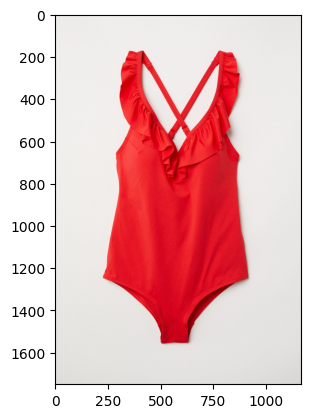



66106
Swimsuit


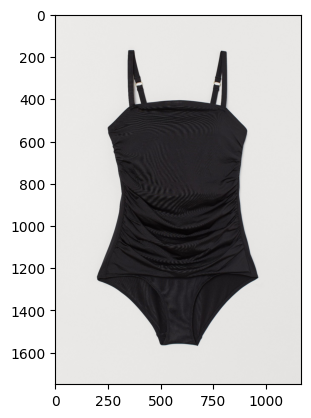



66107
Bikini top


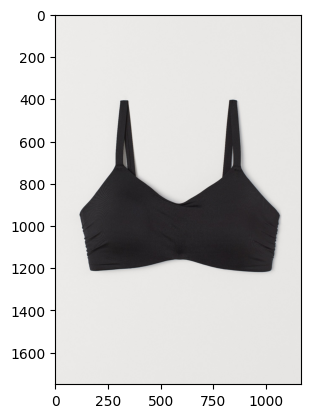



66108
Swimwear bottom


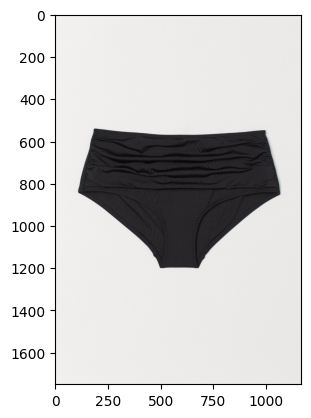



68502
Slippers


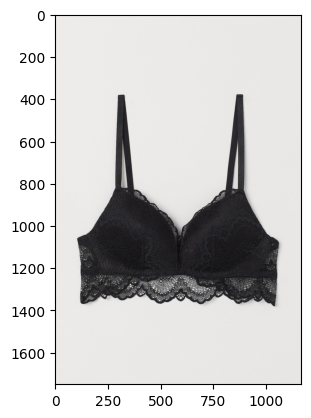



68503
Slippers


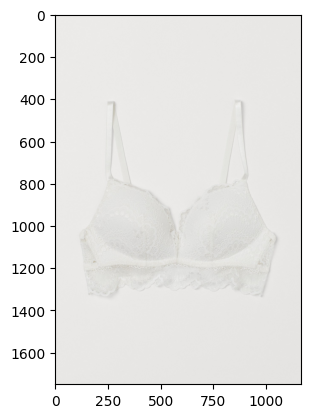



80896
Swimsuit


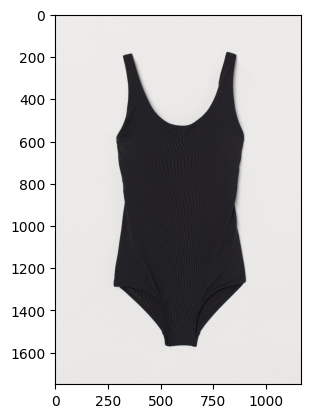



81438
Bikini top


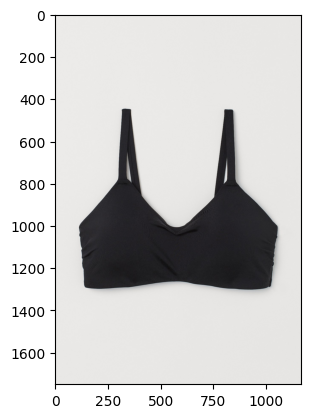

In [93]:
indx = selected_articles.loc[(selected_articles['index_group_name'] =='Ladieswear') & 
        (selected_articles['index_name']== 'Lingeries/Tights') & 
        (selected_articles['section_name']== 'Womens Lingerie') & 
        (selected_articles['garment_group_name'] == 'Under-, Nightwear') & 
        (selected_articles['product_type_name'].isin(['Swimsuit','Bikini top','Slippers','Swimwear bottom'])),['article_id','product_type_name']]

for i,row in indx.iterrows():
    print(i)
    print_img(indx = i)
    plt.show()
    print('\n')
    
## Therefore we can remove Slippers(not shoes as we thought)

In [118]:
selected_articles.loc[(selected_articles['index_group_name'] =='Ladieswear') & 
        (selected_articles['index_name']== 'Lingeries/Tights') & 
        (selected_articles['section_name']== 'Womens Nightwear, Socks & Tigh') & 
        (selected_articles['garment_group_name'] == 'Socks and Tights') & 
        (selected_articles['product_type_name'].isin(['Leggings/Tights'])),'prod_name'].value_counts()

## We'll take only leggings and skip tights

prod_name
Mama Shiny Leggings               2
Biker shorts rib                  2
Seamless Leggings Rib             2
Control Top 100 den 1p Tights     2
Fleece leggings 1 p               2
Shape Up 30 den 1p Tights         1
Fake Snake 1p Leggings            1
Biker shorts                      1
Sport Line Leggings               1
Glossy 1p Leggings                1
Fake Suede 1 Leggings             1
Lace 1p leggings                  1
40 den 2p Tights Conscious        1
Stirrup 1p leggings               1
Kicki 1p Leggings                 1
Mama 40 Den 2p Tights Consciou    1
Seamless Leggings Plain           1
Fake legging NEW FIT              1
Heavy rib Concious 1p leggings    1
MAMA Clean Edge leggings          1
Control Top 50 den 1p Tights      1
Lurex Leggings                    1
Net 1p Leggings                   1
Control Top 30 den 1p Tights      1
Mama fleece leggings              1
Mama plain cotton leggings 2p     1
Mama 200 den Leggings             1
Fake 1p Leggings  

    Below code prints all the 33 images of Slippers
    All the images are slippers and we can use them in our code

In [117]:
# indx = selected_articles.loc[(selected_articles['index_group_name'] =='Ladieswear') & 
#         (selected_articles['index_name']== 'Lingeries/Tights') & 
#         (selected_articles['section_name']== 'Womens Nightwear, Socks & Tigh') & 
#         (selected_articles['garment_group_name'] == 'Socks and Tights') & 
#         (selected_articles['product_type_name'].isin(['Slippers'])),['article_id','product_type_name']]

# for i,row in indx.iterrows():
#     print(i)
#     print_img(indx = i)
#     plt.show()
#     print('\n')

    from above we can keep remove -  
    WomensLingerie - Under, Nightwear - Slippers
    womens Nightwear, Socks & tigh - Socks and tights  - just tights and keep leggings


### index_group_name - sport

In [123]:
pd.DataFrame(selected_articles.loc[selected_articles['index_group_name'] == 'Sport', ['section_name', 'department_name']].value_counts()).sort_values(by='section_name')

count
section_name     department_name                       
Kids Sports      Tops Girls                         256
                 Bottoms Girls                      243
                 Tops Boys                           45
                 Bottoms Boys                        27
Ladies H&M Sport Ladies Sport Bras                  727
                 Ladies Sport Bottoms               468
                 Ladies Sport Woven                 172
                 Ladies Sport Acc                    79
                 Woven bottoms inactive from S.7      1
Men H&M Sport    Men Sport Woven                    300
                 Men Sport Tops                     248
                 Men Sport Bottoms                  200
                 Men Sport Acc                        7

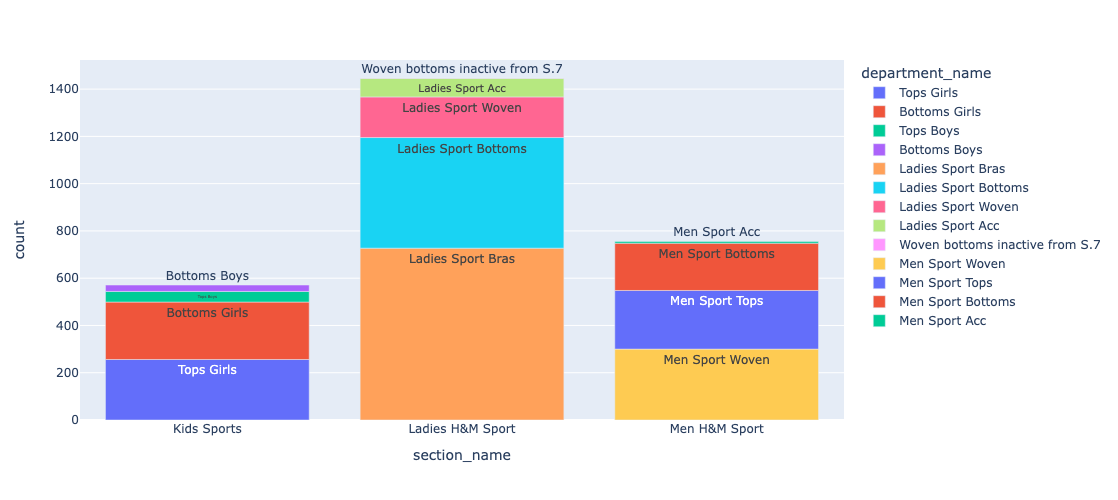

In [414]:
vis_df = pd.DataFrame(selected_articles.loc[selected_articles['index_group_name'] == 'Sport', ['section_name', 'department_name']].value_counts()).reset_index().sort_values(by='section_name')
fig = px.bar(vis_df,x = 'section_name', color="department_name",y= 'count',  text = 'department_name',width=1100, height=500)
fig.show()

    we need to check Ladies and mens Acc and 'Woven bottoms inactive from S.7'

In [126]:
selected_articles.loc[(selected_articles['department_name']=='Ladies Sport Acc'),'product_group_name'].value_counts()

product_group_name
Swimwear              76
Shoes                  2
Garment Upper body     1
Name: count, dtype: int64

In [130]:
selected_articles.loc[(selected_articles['department_name']=='Woven bottoms inactive from S.7')]

,article_id,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc
3851,0501921001,ITALY trousers,Trousers,Garment Lower body,Solid,Black,Woven bottoms inactive from S.7,Sport,Sport,Ladies H&M Sport,Trousers,"Stretch outdoor trousers in water-repellent, b..."


In [127]:
selected_articles.loc[(selected_articles['department_name']=='Men Sport Acc'),'product_group_name'].value_counts()

product_group_name
Garment Upper body    4
Unknown               2
Garment Lower body    1
Name: count, dtype: int64

### Drop - ...

In [448]:
pd.DataFrame(selected_articles[['index_group_name', 'index_name']].value_counts()).sort_values(by='index_group_name')

count
index_group_name index_name                           
Baby/Children    Children Sizes 92-140           10666
                 Children Sizes 134-170           8152
                 Baby Sizes 50-98                 6999
                 Children Accessories, Swimwear   2621
Divided          Divided                         13376
Ladieswear       Ladieswear                      25532
                 Ladies Accessories               2044
                 Lingeries/Tights                 1938
Menswear         Menswear                        10275
Sport            Sport                            2773

    1.Baby/Children 
    2.Ladieswear - WomensLingerie - Under, Nightwear - Slippers
                   womens Nightwear, Socks & tigh - Socks and tights  - just tights and keep leggings
    3.Divided - Divided Accessories	 - Accessories
    4.Sport - Kids Sport 

In [449]:
ign_baby_children_indx = selected_articles[selected_articles['index_group_name']=='Baby/Children'].index
ign_baby_children_indx

Index([    4,     5,    28,    29,    30,    32,    38,    43,    44,    77,
       ...
       84315, 84316, 84317, 84338, 84343, 84358, 84359, 84361, 84362, 84364],
      dtype='int64', length=28438)

In [450]:
selected_articles.drop(index=ign_baby_children_indx,axis = 0,inplace = True) # dropping index_group_name baby children
selected_articles

,article_id,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc
0,0108775015,Strap top,Vest top,Garment Upper body,Solid,Black,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.
1,0108775044,Strap top,Vest top,Garment Upper body,Solid,White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.
2,0108775051,Strap top (1),Vest top,Garment Upper body,Stripe,Off White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.
3,0111586001,Shape Up 30 den 1p Tights,Leggings/Tights,Garment Lower body,Solid,Black,Tights basic,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights,Tights with built-in support to lift the botto...
6,0116379047,Frugan longsleeve,Top,Garment Upper body,Solid,Dark Blue,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Fitted top in soft stretch jersey with a wide ...
...,...,...,...,...,...,...,...,...,...,...,...,...
84371,0952937003,Jets dress,Dress,Garment Full body,All over pattern,Beige,Jersey,Ladieswear,Ladieswear,Womens Trend,Jersey Fancy,"Fitted, calf-length dress in viscose jersey wi..."
84372,0952938001,Elton top,Top,Garment Upper body,All over pattern,Beige,Jersey,Ladieswear,Ladieswear,Womens Trend,Jersey Fancy,Fitted top in jersey with a round neckline and...
84373,0953763001,SPORT Malaga tank,Vest top,Garment Upper body,Solid,Black,Jersey,Ladieswear,Ladieswear,H&M+,Jersey Fancy,Loose-fitting sports vest top in ribbed fast-d...
84374,0956217002,Cartwheel dress,Dress,Garment Full body,Solid,Black,Jersey,Ladieswear,Ladieswear,Womens Trend,Jersey Fancy,"Short, A-line dress in jersey with a round nec..."


In [451]:
len(selected_articles)

55938

In [452]:
ign_ladies_lingerie_indx = selected_articles.loc[(selected_articles['index_group_name'] =='Ladieswear') & 
        (selected_articles['index_name']== 'Lingeries/Tights') & 
        (selected_articles['section_name']== 'Womens Lingerie') & 
        (selected_articles['garment_group_name'] == 'Under-, Nightwear') & 
        (selected_articles['product_type_name']=='Slippers')].index

print(ign_ladies_lingerie_indx)

# we decided to remove slippers from this dataframe as they are wrongly labeled as slippers/shoes, but actually they are womens underwear

Index([68502, 68503], dtype='int64')


In [453]:
selected_articles.drop(index=ign_ladies_lingerie_indx,axis = 0,inplace = True) 
len(selected_articles)
# dropping slippers from womens lingerie as they are underwear and we are only interested in external clothing. 

55936

In [454]:
temp_legging = pd.DataFrame(selected_articles.loc[(selected_articles['index_group_name'] =='Ladieswear') & 
        (selected_articles['index_name']== 'Lingeries/Tights') & 
        (selected_articles['section_name']== 'Womens Nightwear, Socks & Tigh') & 
        (selected_articles['garment_group_name'] == 'Socks and Tights') & 
        (selected_articles['product_type_name'].isin(['Leggings/Tights'])),'prod_name'])
temp_legging

,prod_name
3,Shape Up 30 den 1p Tights
18,Control Top 50 den 1p Tights
31,200 den 1p leggings
33,Nouvelle 1p Stay Up
37,Box 4p Tights
42,Highwaist 30 den 1p Tights
55,Control Top 100 den 1p Tights
56,Control Top 100 den 1p Tights
58,Fleece 1 p tights
105,Fleece leggings 1 p


In [455]:
temp_legging_indx = temp_legging[temp_legging['prod_name'].str.contains('legging',case=False)].index
temp_legging_indx

Index([   31,   105,   106,   483,   889,  1016,  1523,  7810,  7821, 17828,
       45518, 48329, 52796, 60511, 61195, 61530, 62380, 62381, 74696, 82129,
       83800, 83801, 83878, 84076, 84283],
      dtype='int64')

In [456]:
selected_articles.drop(index=temp_legging_indx,axis = 0,inplace = True) 
len(selected_articles)

55911

In [457]:
sports_kids_indx= selected_articles.loc[(selected_articles['index_group_name']=='Sport') & (selected_articles['section_name']=='Kids Sports')].index

In [458]:
selected_articles.drop(index=sports_kids_indx,axis = 0,inplace = True) 
len(selected_articles)

55340

In [459]:
divided_acc = selected_articles.loc[(selected_articles['index_group_name'] == 'Divided') & (selected_articles['garment_group_name'] == 'Accessories')].index
selected_articles.drop(index=divided_acc,axis = 0,inplace = True) 
len(selected_articles)

55338

## Column - Section Name

In [460]:
pd.DataFrame(selected_articles[['index_group_name','index_name','section_name']].value_counts()).sort_values(by='index_group_name')

count
index_group_name index_name         section_name                         
Divided          Divided            Divided Selected                  991
                                    Divided Collection               7124
                                    Divided Basics                   1430
                                    EQ Divided                         26
                                    Divided Projects                 2345
                                    Divided Complements Other          34
                                    Ladies Denim                      874
                                    Divided Accessories               275
                                    Divided Asia keys                 275
Ladieswear       Ladieswear         Ladies Other                        4
                                    Special Collections               584
                                    Collaborations                    396
                                    Womens Everyday Collection       7295
                 Lingeries/Tights   Womens Nightwear, Socks & Tigh     52
                                    Womens Lingerie                    45
                 Ladies Accessories Womens Big accessories             13
                                    Womens Small accessories            5
                 Ladieswear         Ladies Denim                      227
                                    Womens Nightwear, Socks & Tigh    204
                                    Womens Jackets                    829
                                    Womens Everyday Basics           1581
                                    Womens Tailoring                 3376
                                    Womens Casual                    2718
                                    Womens Trend                     2565
                                    H&M+                             2267
                                    Mama                             2260
                 Ladies Accessories Womens Shoes                     2026
                 Lingeries/Tights   Womens Swimwear, beachwear       1814
                 Ladieswear         Womens Premium                   1226
Menswear         Menswear           Men Other                           9
                                    Men Other 2                       190
                                    Contemporary Smart               1778
                                    Men Suits & Tailoring            1428
                                    Men Project                       283
                                    Men Edition                       298
                                    Contemporary Street              1487
                                    Denim Men                         521
                                    Mens Outerwear                    629
                                    Men Shoes                         645
                                    Men Underwear                    1444
                                    Contemporary Casual              1560
                                    Men Accessories                     3
Sport            Sport              Ladies H&M Sport                 1447
                                    Men H&M Sport                     755

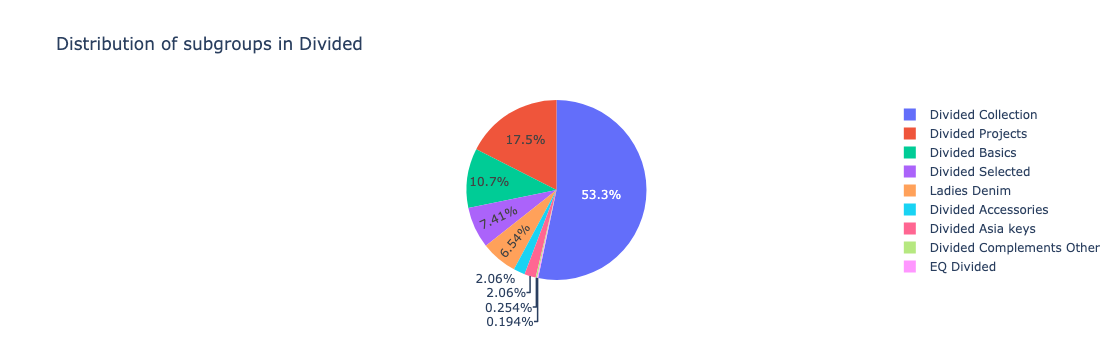

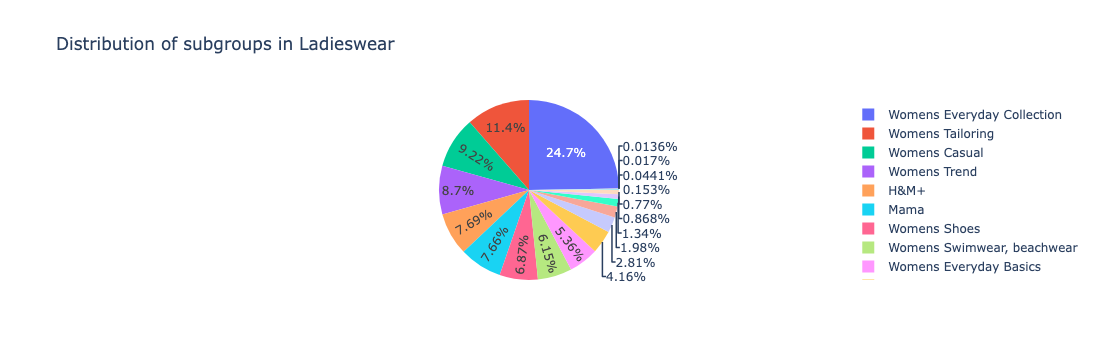

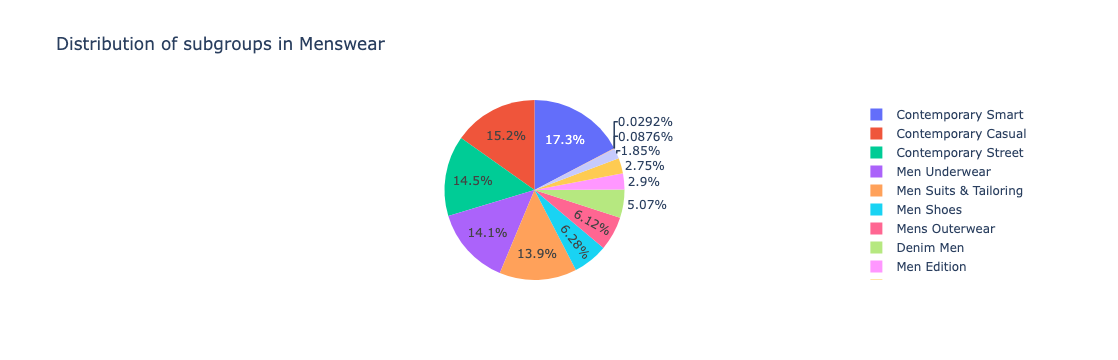

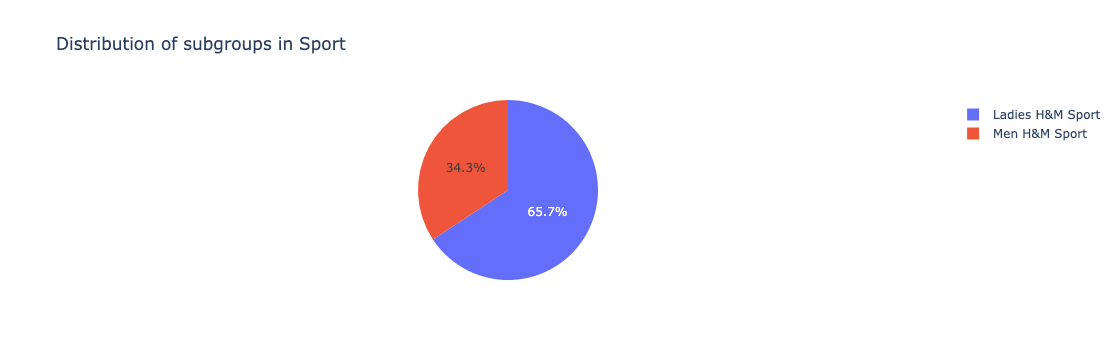

In [462]:
vis_df = pd.DataFrame(selected_articles[['index_group_name','index_name','section_name']].value_counts()).reset_index().sort_values(by='index_group_name')
vis_df

for label in vis_df['index_group_name'].unique():
    fig = px.pie(vis_df, values=vis_df.loc[vis_df['index_group_name'] == label,'count'] ,names=vis_df.loc[vis_df['index_group_name'] == label,'section_name'] , title=f'Distribution of subgroups in {label}')
    fig.show()

    checking - 
    1.ladies big and small accessories
    2.Mens other and other2, Men project, Mens accessories, and underwear

### Accessories in Ladieswear

In [189]:
selected_articles.loc[selected_articles['section_name']=='Womens Small accessories'][['prod_name','detail_desc']]
#they are either dog jacket or phone case cover. Therfaore we can drop them

,prod_name,detail_desc
65621,Dog Miky Coat,Dog jacket in a reflective weave with a hood a...
70562,Dog Puffy Padded Lyx,Padded dog jacket in a shimmering weave with a...
83746,Ruben set,Set with a matching iPhone case and protective...
83747,Ruben set,Set with a matching iPhone case and protective...
83748,Ruben set,Set with a matching iPhone case and protective...


In [196]:
selected_articles.loc[selected_articles['section_name']=='Womens Big accessories']
#big accessories are fine 

,article_id,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc
53473,0751053001,Bodil Poncho,Top,Garment Upper body,Solid,Black,Scarves,Ladies Accessories,Ladieswear,Womens Big accessories,Accessories,Poncho knitted in a soft viscose blend with a ...
53474,0751053002,Bodil Poncho,Top,Garment Upper body,Solid,Grey,Scarves,Ladies Accessories,Ladieswear,Womens Big accessories,Accessories,Poncho knitted in a soft viscose blend with a ...
55255,0757908001,Bodil Poncho,Top,Garment Upper body,Solid,Light Grey,Scarves,Ladies Accessories,Ladieswear,Womens Big accessories,Accessories,"Poncho in a soft, fine knit with a diagonal ne..."
55256,0757908002,Bodil Poncho,Top,Garment Upper body,Solid,Black,Scarves,Ladies Accessories,Ladieswear,Womens Big accessories,Accessories,"Poncho in a soft, fine knit with a diagonal ne..."
55924,0760939002,PQ Bodil poncho,Top,Garment Upper body,Melange,Beige,Scarves,Ladies Accessories,Ladieswear,Womens Big accessories,Accessories,"Poncho in a soft, fine-knit wool and cashmere ..."
70713,0834893001,PQ Bodil Poncho Alpacablend,Top,Garment Upper body,Melange,Beige,Scarves,Ladies Accessories,Ladieswear,Womens Big accessories,Accessories,"Fine-knit poncho in a soft, stretchy alpaca bl..."
74514,0858360001,Berit Poncho,Top,Garment Upper body,Melange,Grey,Scarves,Ladies Accessories,Ladieswear,Womens Big accessories,Accessories,"Poncho in a soft, fine knit with a draped neck..."
74515,0858360002,Berit Poncho,Top,Garment Upper body,Solid,Light Orange,Scarves,Ladies Accessories,Ladieswear,Womens Big accessories,Accessories,"Poncho in a soft, fine knit with a draped neck..."
79874,0887451001,Zamora open Poncho,Top,Garment Upper body,Check,Yellowish Brown,Scarves,Ladies Accessories,Ladieswear,Womens Big accessories,Accessories,"Poncho in a soft weave with a fringed hem, and..."
79875,0887457002,PQ Bodil cashm-mix poncho,Top,Garment Upper body,Melange,Beige,Scarves,Ladies Accessories,Ladieswear,Womens Big accessories,Accessories,"Poncho in a soft, fine-knit wool and cashmere ..."


In [198]:
womens_acc_indx = selected_articles.loc[selected_articles['section_name']=='Womens Small accessories'].index 
selected_articles.drop(index=womens_acc_indx,axis = 0,inplace = True) 
len(selected_articles)

55333

### Mens others and others2 

In [204]:
selected_articles.loc[selected_articles['section_name']=='Men Other',['product_type_name']].value_counts()

product_type_name
Sandals              2
Shirt                2
Shorts               2
Hoodie               1
Jacket               1
Trousers             1
Name: count, dtype: int64

In [203]:
selected_articles.loc[selected_articles['section_name']=='Men Other 2',['product_type_name']].value_counts()

product_type_name 
Shirt                 49
T-shirt               46
Shorts                41
Trousers              20
Blazer                18
Polo shirt             9
Costumes               2
Vest top               2
Jacket                 1
Outdoor Waistcoat      1
Tailored Waistcoat     1
Name: count, dtype: int64

### Men Project

In [217]:
selected_articles.loc[selected_articles['section_name']=='Men Project',['product_type_name']].value_counts()

product_type_name
Sweater              89
T-shirt              52
Trousers             30
Jacket               30
Shirt                24
Shorts               13
Coat                  7
Polo shirt            6
Jumpsuit/Playsuit     6
Top                   5
Hoodie                5
Vest top              4
Slippers              2
Sneakers              2
Cardigan              2
Bootie                1
Outdoor Waistcoat     1
Swimwear bottom       1
Garment Set           1
Flat shoe             1
Blazer                1
Name: count, dtype: int64

### Mens Accessories

In [218]:
selected_articles.loc[selected_articles['section_name']=='Men Accessories',['product_type_name']].value_counts()
## unknows is tzckled in next section of the code

product_type_name
Unknown              3
Name: count, dtype: int64

In [219]:
selected_articles.loc[selected_articles['section_name']=='Men Accessories']

,article_id,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc
71009,0836789001,Braces Richard 3-clip,Unknown,Unknown,Solid,Black,Small Accessories,Menswear,Menswear,Men Accessories,Accessories,Adjustable elastic braces with imitation leath...
73000,0850261002,Cap John Solid,Unknown,Unknown,Solid,Black,Accessories,Menswear,Menswear,Men Accessories,Accessories,Cap in cotton twill with an inner sweatband an...
83151,0916766001,Hat Bucket Sporty Adam,Unknown,Unknown,Solid,Black,Accessories,Menswear,Menswear,Men Accessories,Accessories,Bucket hat in woven fabric with a decorative b...


### Mens Underwear

In [221]:
selected_articles.loc[selected_articles['section_name']=='Men Underwear',['product_type_name']].value_counts()

product_type_name
T-shirt              447
Swimwear bottom      236
Hoodie               205
Sweater              124
Top                  107
Shorts                96
Trousers              94
Polo shirt            77
Vest top              53
Unknown                5
Name: count, dtype: int64

### Men Shoes

In [222]:
selected_articles.loc[selected_articles['section_name']=='Men Shoes',['product_type_name']].value_counts()

product_type_name
Sneakers             274
Other shoe           156
Boots                107
Sandals               53
Flip flop             25
Slippers              21
Flat shoes             9
Name: count, dtype: int64

## garment_group_name

In [227]:
pd.DataFrame(selected_articles[['index_group_name','garment_group_name']].value_counts()).sort_values(by = 'index_group_name')

count
index_group_name garment_group_name       
Divided          Trousers             1279
                 Skirts                528
                 Special Offers        124
                 Unknown               748
                 Outdoor               770
                 Trousers Denim        879
                 Swimwear               76
                 Shorts                275
                 Knitwear             1296
                 Blouses              1346
                 Jersey Basic         1381
                 Shoes                 277
                 Jersey Fancy         2128
                 Dresses Ladies       2267
Ladieswear       Accessories            13
                 Shorts                429
                 Under-, Nightwear     249
                 Blouses              4492
                 Special Offers        528
                 Dressed               624
                 Trousers Denim        227
                 Knitwear             2889
                 Skirts                726
                 Trousers             2767
                 Dresses Ladies       2606
                 Outdoor              1025
                 Socks and Tights       52
                 Shoes                2026
                 Swimwear             1814
                 Jersey Basic         1359
                 Unknown              1569
                 Jersey Fancy         6087
Menswear         Accessories            22
                 Special Offers          9
                 Swimwear              236
                 Under-, Nightwear      12
                 Outdoor               664
                 Trousers Denim        398
                 Shorts                464
                 Unknown               474
                 Shoes                 645
                 Socks and Tights        3
                 Trousers             1124
                 Jersey Basic         1193
                 Knitwear             1239
                 Shirts               1434
                 Jersey Fancy         2074
                 Dressed               284
Sport            Outdoor               248
                 Unknown               172
                 Accessories            86
                 Jersey Fancy         1695
                 Trousers                1

    need to check - 
    mens Under-, Nightwear and Socks and Tights	

In [228]:
selected_articles.loc[(selected_articles['index_group_name'] == 'Menswear') & (selected_articles['garment_group_name'].isin(['Under-, Nightwear','Socks and Tights']) )]

,article_id,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc
1235,0398814001,Thomas tanktop,Vest top,Garment Upper body,Solid,White,Underwear Jersey,Menswear,Menswear,Men Underwear,"Under-, Nightwear",Vest top in ribbed organic cotton jersey.
1236,0398814002,Thomas tanktop,Vest top,Garment Upper body,Solid,Black,Underwear Jersey,Menswear,Menswear,Men Underwear,"Under-, Nightwear",Vest top in ribbed organic cotton jersey.
7689,0544778001,Tam Tanktop,Vest top,Garment Upper body,Solid,White,Underwear Jersey Fancy inactive from s1,Menswear,Menswear,Men Underwear,"Under-, Nightwear",Jersey vest top in soft pima cotton.
7690,0544778002,Tam Tanktop,Vest top,Garment Upper body,Solid,Black,Underwear Jersey Fancy inactive from s1,Menswear,Menswear,Men Underwear,"Under-, Nightwear",Jersey vest top in soft pima cotton.
7691,0544779001,Ryan Roundneck,T-shirt,Garment Upper body,Solid,White,Underwear Jersey Fancy inactive from s1,Menswear,Menswear,Men Underwear,"Under-, Nightwear",Jersey T-shirt in soft jersey made from pima c...
7692,0544779002,Ryan Roundneck,T-shirt,Garment Upper body,Solid,Black,Underwear Jersey Fancy inactive from s1,Menswear,Menswear,Men Underwear,"Under-, Nightwear",Jersey T-shirt in soft jersey made from pima c...
28940,0651862001,KEN RUNNER SHORTS,Shorts,Garment Lower body,Solid,Dark Blue,Loungewear,Menswear,Menswear,Men Underwear,"Under-, Nightwear",Shorts in lightweight sweatshirt fabric with a...
28941,0651862003,KEN RUNNER SHORTS,Shorts,Garment Lower body,Solid,Dark Red,Loungewear,Menswear,Menswear,Men Underwear,"Under-, Nightwear",Shorts in lightweight sweatshirt fabric with a...
57594,0768470001,Thomas Tanktop 2pk,Vest top,Garment Upper body,Solid,White,Underwear Jersey,Menswear,Menswear,Men Underwear,"Under-, Nightwear",Vest tops in stretch organic cotton jersey.
57595,0768470002,Thomas Tanktop 2pk,Vest top,Garment Upper body,Solid,Black,Underwear Jersey,Menswear,Menswear,Men Underwear,"Under-, Nightwear",Vest tops in stretch organic cotton jersey.


# Rows - Unknown from product_group_name

We look at further categories present inside the 'Unknown' product group.

In [223]:
selected_articles.loc[selected_articles['product_group_name']=='Unknown'][['product_type_name','section_name','department_name']].value_counts()

product_type_name  section_name                    department_name     
Unknown            Womens Lingerie                 Clean Lingerie          21
                                                   Expressive Lingerie     11
                   Ladies Denim                    Denim Trousers           9
                   Womens Lingerie                 Casual Lingerie          7
                   Men Suits & Tailoring           Knitwear                 6
                   Denim Men                       Denim shorts             5
                   Divided Collection              Trousers                 4
                   Mens Outerwear                  Jacket Casual            4
                   Womens Nightwear, Socks & Tigh  Tights basic             3
                   Ladies H&M Sport                Ladies Sport Bottoms     3
                   Womens Everyday Basics          Jersey Basic             3
                   Men Underwear                   Socks Bin          

Even though the product type is still mentioned as 'Unknown', there are section names and department names available.

In [ ]:
['Clean Lingerie','Expressive Lingerie','Casual Lingerie','Other items','Baby Girl Woven','Accessories','Kids Girl Dresses', 'Socks','Small Accessories','Bags','Young Girl Jersey Basic','Dress-up Boys','Young Boy Denim']

checking what is Socks Bin, Men Sport Acc 

In [224]:
selected_articles.loc[ (selected_articles['product_type_name'] == 'Unknown') & (selected_articles['department_name']=='Socks Bin')]

,article_id,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc
73463,0852678002,5p Mesh Invisible Basic,Unknown,Unknown,Solid,Black,Socks Bin,Menswear,Menswear,Men Underwear,Socks and Tights,No-show trainer socks in mesh with a silicone ...
73464,0852678003,5p Mesh Invisible Basic,Unknown,Unknown,Solid,White,Socks Bin,Menswear,Menswear,Men Underwear,Socks and Tights,No-show trainer socks in mesh with a silicone ...
73465,0852678004,5p Mesh Invisible Basic,Unknown,Unknown,Solid,Dark Blue,Socks Bin,Menswear,Menswear,Men Underwear,Socks and Tights,No-show trainer socks in mesh with a silicone ...


so we can drop entire Men Underwear section

In [229]:
selected_articles.loc[ (selected_articles['product_type_name'] == 'Unknown') & (selected_articles['department_name']=='Men Sport Acc')]

,article_id,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc
63611,0801092001,Glacier base layer tights,Unknown,Unknown,Solid,Black,Men Sport Acc,Sport,Sport,Men H&M Sport,Accessories,Longjohns with an elasticated waist and flatlo...
84213,0935704001,Jack Beanie.,Unknown,Unknown,Solid,Black,Men Sport Acc,Sport,Sport,Men H&M Sport,Accessories,"Hat in a soft, textured-knit wool blend with f..."


Plotting the distribution of various sections under 'Unknown'

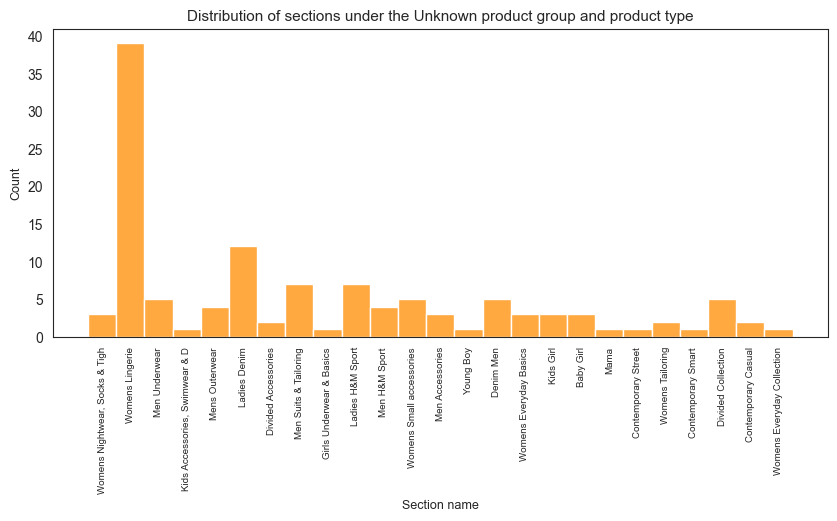

In [230]:
plt.figure(figsize=(10,4))
sns.set_style("white")
sns.histplot(x=articles.loc[articles['product_group_name']=='Unknown']['section_name'],color='darkorange')
plt.title('Distribution of sections under the Unknown product group and product type', fontsize=11)
plt.xlabel('Section name',fontsize=9)
plt.ylabel('Count',fontsize=9)
plt.xticks(rotation=90, fontsize=7)
plt.show()

the sections correspond more with the type of customers (Women, Men, Kids, etc.). It is still not very clear what type of clothing articles each section has. So we plot the distribution of departments next.

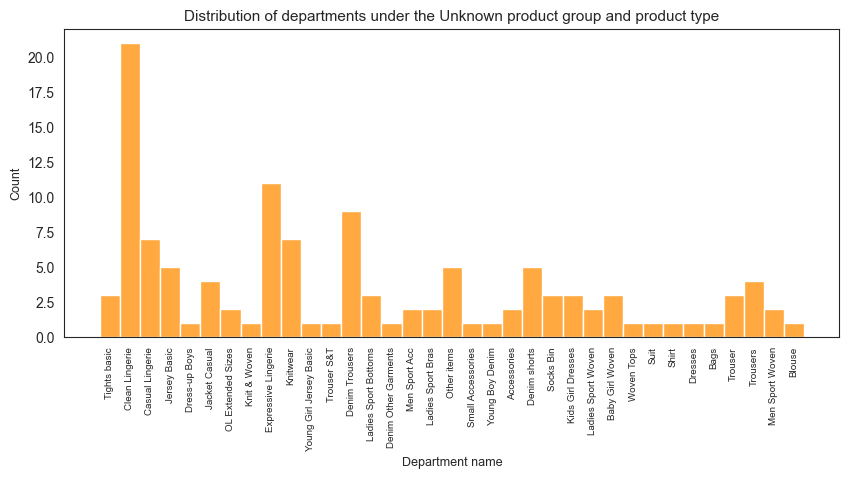

In [231]:
plt.figure(figsize=(10,4))
sns.histplot(x=articles.loc[articles['product_group_name']=='Unknown']['department_name'],color='darkorange')
plt.title('Distribution of departments under the Unknown product group and product type', fontsize=11)
plt.xlabel('Department name', fontsize=9)
plt.ylabel('Count',fontsize=9)
plt.xticks(rotation=90, fontsize=7)
plt.show()

Here we can easily see the actual types of products included. We select only the ones we want by dropping other departments.

In [233]:
departments_to_remove_list=['Clean Lingerie','Expressive Lingerie','Casual Lingerie','Other items','Baby Girl Woven','Accessories','Kids Girl Dresses', 'Socks Bin',
 'Small Accessories','Bags','Young Girl Jersey Basic','Dress-up Boys','Young Boy Denim']
selected_unknownproductgroup_articles = selected_articles.loc[(selected_articles['product_group_name']=='Unknown') &
                                          (~selected_articles['department_name'].isin(departments_to_remove_list))]

indices_to_replace=selected_unknownproductgroup_articles.index
selected_articles.loc[indices_to_replace]=selected_unknownproductgroup_articles

In [234]:
selected_articles

,article_id,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc
0,0108775015,Strap top,Vest top,Garment Upper body,Solid,Black,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.
1,0108775044,Strap top,Vest top,Garment Upper body,Solid,White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.
2,0108775051,Strap top (1),Vest top,Garment Upper body,Stripe,Off White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.
3,0111586001,Shape Up 30 den 1p Tights,Leggings/Tights,Garment Lower body,Solid,Black,Tights basic,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights,Tights with built-in support to lift the botto...
6,0116379047,Frugan longsleeve,Top,Garment Upper body,Solid,Dark Blue,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Fitted top in soft stretch jersey with a wide ...
...,...,...,...,...,...,...,...,...,...,...,...,...
84371,0952937003,Jets dress,Dress,Garment Full body,All over pattern,Beige,Jersey,Ladieswear,Ladieswear,Womens Trend,Jersey Fancy,"Fitted, calf-length dress in viscose jersey wi..."
84372,0952938001,Elton top,Top,Garment Upper body,All over pattern,Beige,Jersey,Ladieswear,Ladieswear,Womens Trend,Jersey Fancy,Fitted top in jersey with a round neckline and...
84373,0953763001,SPORT Malaga tank,Vest top,Garment Upper body,Solid,Black,Jersey,Ladieswear,Ladieswear,H&M+,Jersey Fancy,Loose-fitting sports vest top in ribbed fast-d...
84374,0956217002,Cartwheel dress,Dress,Garment Full body,Solid,Black,Jersey,Ladieswear,Ladieswear,Womens Trend,Jersey Fancy,"Short, A-line dress in jersey with a round nec..."


This is our final dataframe after completing the analysis of 'Unknown' product groups

In [235]:
selected_articles

,article_id,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc
0,0108775015,Strap top,Vest top,Garment Upper body,Solid,Black,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.
1,0108775044,Strap top,Vest top,Garment Upper body,Solid,White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.
2,0108775051,Strap top (1),Vest top,Garment Upper body,Stripe,Off White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.
3,0111586001,Shape Up 30 den 1p Tights,Leggings/Tights,Garment Lower body,Solid,Black,Tights basic,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights,Tights with built-in support to lift the botto...
6,0116379047,Frugan longsleeve,Top,Garment Upper body,Solid,Dark Blue,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Fitted top in soft stretch jersey with a wide ...
...,...,...,...,...,...,...,...,...,...,...,...,...
84371,0952937003,Jets dress,Dress,Garment Full body,All over pattern,Beige,Jersey,Ladieswear,Ladieswear,Womens Trend,Jersey Fancy,"Fitted, calf-length dress in viscose jersey wi..."
84372,0952938001,Elton top,Top,Garment Upper body,All over pattern,Beige,Jersey,Ladieswear,Ladieswear,Womens Trend,Jersey Fancy,Fitted top in jersey with a round neckline and...
84373,0953763001,SPORT Malaga tank,Vest top,Garment Upper body,Solid,Black,Jersey,Ladieswear,Ladieswear,H&M+,Jersey Fancy,Loose-fitting sports vest top in ribbed fast-d...
84374,0956217002,Cartwheel dress,Dress,Garment Full body,Solid,Black,Jersey,Ladieswear,Ladieswear,Womens Trend,Jersey Fancy,"Short, A-line dress in jersey with a round nec..."


In [42]:
selected_articles.describe()

,article_id,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc
count,86275,86275,86275,86275,86275,86275,86275,86275,86275,86275,86275,86275,86275,85921
unique,86275,36655,53,7,30,50,8,20,225,10,5,56,21,35422
top,0108775015,Dragonfly dress,Trousers,Garment Upper body,Solid,Black,Dark,Black,Jersey,Ladieswear,Ladieswear,Womens Everyday Collection,Jersey Fancy,T-shirt in printed cotton jersey.
freq,1,98,11169,42741,38167,18459,35782,18419,4571,25584,30177,7295,21077,159


below are the product names that we might want to look into before finalizing them in final dataset

Plotting the distributions of product tpes, garment groups and colors in the dataframe

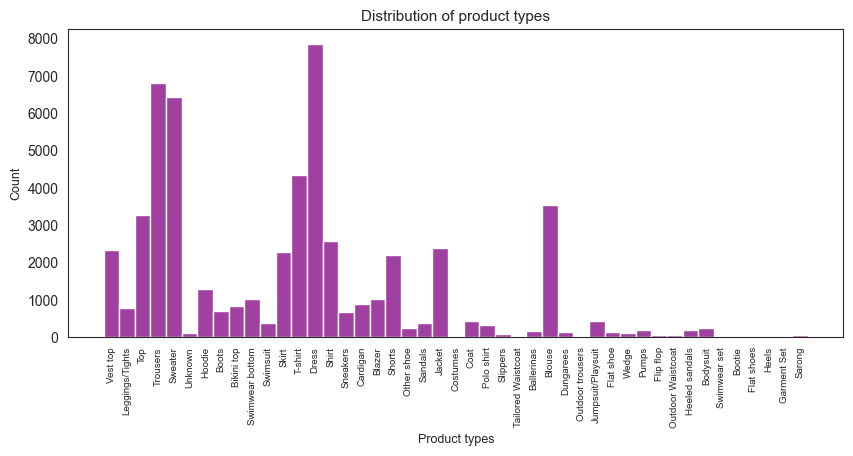

In [237]:
plt.figure(figsize=(10,4))
sns.histplot(x=selected_articles['product_type_name'],color='purple')
plt.title('Distribution of product types',fontsize=11)
plt.xlabel('Product types',fontsize=9)
plt.ylabel('Count',fontsize=9)
plt.xticks(rotation=90, fontsize=7)
plt.show()

Trousers, dresses, sweaters and T-shirts constitute the majority part of the products

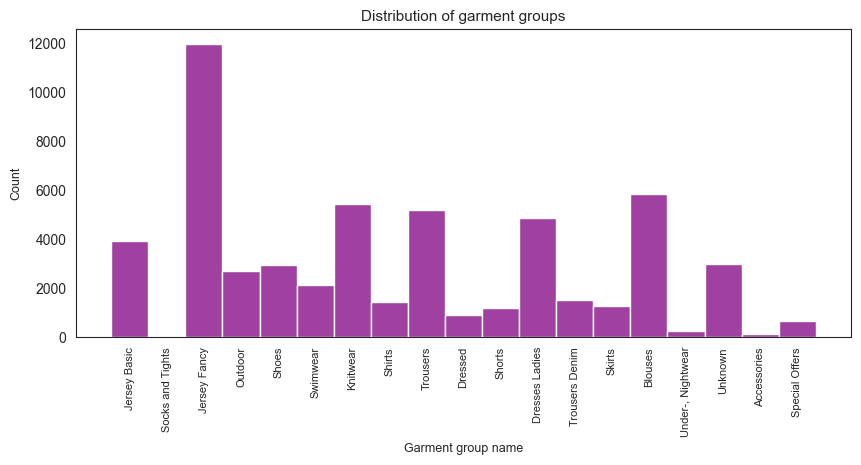

In [238]:
plt.figure(figsize=(10,4))
sns.histplot(x=selected_articles['garment_group_name'],color='purple')
plt.title('Distribution of garment groups',fontsize=11)
plt.xlabel('Garment group name',fontsize=9)
plt.ylabel('Count',fontsize=9)
plt.xticks(rotation=90, fontsize=8)
plt.show()

The fancy jersey garment group has the highest number of articles

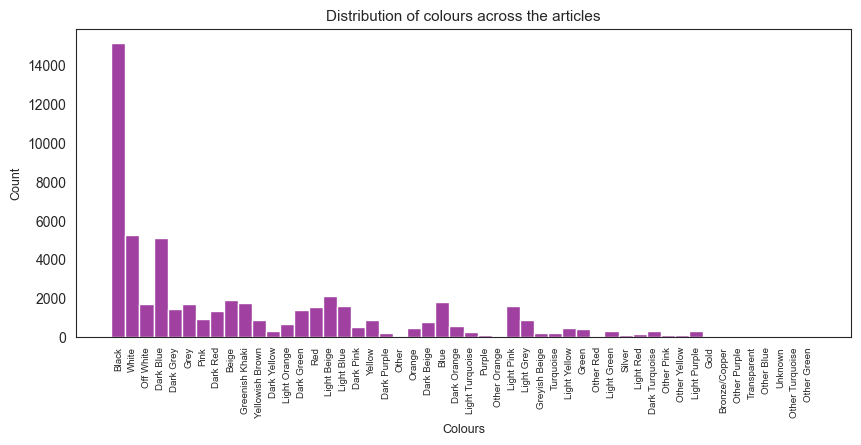

In [239]:
plt.figure(figsize=(10,4))
sns.histplot(x=selected_articles['colour_group_name'],color='purple')
plt.title('Distribution of colours across the articles',fontsize=11)
plt.xlabel('Colours',fontsize=9)
plt.ylabel('Count',fontsize=9)
plt.xticks(rotation=90, fontsize=7)
plt.show()

Black, dark blue and white are the most common colors available

According to the dataset description, the first 3 digits of an article id correspond to the folder number in which that article's image is present. We extract these digits (indices) to get a list of image folders we're working with  

In [242]:
selected_articles

,article_id,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc
0,0108775015,Strap top,Vest top,Garment Upper body,Solid,Black,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.
1,0108775044,Strap top,Vest top,Garment Upper body,Solid,White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.
2,0108775051,Strap top (1),Vest top,Garment Upper body,Stripe,Off White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.
3,0111586001,Shape Up 30 den 1p Tights,Leggings/Tights,Garment Lower body,Solid,Black,Tights basic,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights,Tights with built-in support to lift the botto...
6,0116379047,Frugan longsleeve,Top,Garment Upper body,Solid,Dark Blue,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Fitted top in soft stretch jersey with a wide ...
...,...,...,...,...,...,...,...,...,...,...,...,...
84371,0952937003,Jets dress,Dress,Garment Full body,All over pattern,Beige,Jersey,Ladieswear,Ladieswear,Womens Trend,Jersey Fancy,"Fitted, calf-length dress in viscose jersey wi..."
84372,0952938001,Elton top,Top,Garment Upper body,All over pattern,Beige,Jersey,Ladieswear,Ladieswear,Womens Trend,Jersey Fancy,Fitted top in jersey with a round neckline and...
84373,0953763001,SPORT Malaga tank,Vest top,Garment Upper body,Solid,Black,Jersey,Ladieswear,Ladieswear,H&M+,Jersey Fancy,Loose-fitting sports vest top in ribbed fast-d...
84374,0956217002,Cartwheel dress,Dress,Garment Full body,Solid,Black,Jersey,Ladieswear,Ladieswear,Womens Trend,Jersey Fancy,"Short, A-line dress in jersey with a round nec..."


In [256]:
selected_articles[selected_articles['prod_name'].str.contains('sock',case = False)]
#lets remove first row as its sock

,article_id,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc
36,0156224002,Box 4p Socks,Unknown,Unknown,Solid,Black,Tights basic,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights,Semi-matte socks with a short shaft. 20 denier.
5769,0523689004,Brenda Sock Boot,Boots,Shoes,Solid,Black,Divided Shoes,Divided,Divided,Divided Accessories,Shoes,Ankle boots with satin linings and insoles and...
12903,0573892001,Cyan sock runner,Sneakers,Shoes,Solid,Black,Shoes,Menswear,Menswear,Men Shoes,Shoes,"Scuba fabric hi-tops with woven sections, refl..."
22231,0623498001,Caleb sock runner,Sneakers,Shoes,Solid,Black,Shoes,Menswear,Menswear,Men Shoes,Shoes,"Fully-fashioned trainers with a high, rib-trim..."
22232,0623498002,Caleb sock runner,Sneakers,Shoes,Solid,Black,Shoes,Menswear,Menswear,Men Shoes,Shoes,"Fully-fashioned trainers with a high, rib-trim..."
24525,0631870001,Christer sock runner (1),Sneakers,Shoes,Melange,Grey,Shoes,Menswear,Menswear,Men Shoes,Shoes,Fully-fashioned trainers with elastication aro...
24526,0631870002,Christer sock runner (1),Sneakers,Shoes,Solid,Black,Shoes,Menswear,Menswear,Men Shoes,Shoes,Fully-fashioned trainers with elastication aro...
24527,0631870004,Christer sock runner (1),Sneakers,Shoes,Solid,White,Shoes,Menswear,Menswear,Men Shoes,Shoes,Fully-fashioned trainers with elastication aro...
24528,0631870009,Christer sock runner (1),Sneakers,Shoes,Solid,Beige,Shoes,Menswear,Menswear,Men Shoes,Shoes,Fully-fashioned trainers with elastication aro...
24529,0631870011,Christer sock runner (1),Sneakers,Shoes,Melange,Dark Blue,Shoes,Menswear,Menswear,Men Shoes,Shoes,Fully-fashioned trainers with elastication aro...


In [262]:
selected_articles.drop(index=[36],axis=0,inplace=True)

In [264]:
selected_articles[selected_articles['prod_name'].str.contains('underwear',case = False)]

,article_id,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc


In [265]:
indices=[x[:3] for x in selected_articles['article_id']]
indices=sorted(list(set(indices)))
indices[:10]

['010', '011', '012', '014', '015', '017', '018', '019', '020', '021']

In [266]:
len(indices)

84

# Creating new column gender

In [328]:
selected_articles.head()

,article_id,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc,gender
0,0108775015,Strap top,Vest top,Garment Upper body,Solid,Black,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.,women
1,0108775044,Strap top,Vest top,Garment Upper body,Solid,White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.,women
2,0108775051,Strap top (1),Vest top,Garment Upper body,Stripe,Off White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.,women
3,0111586001,Shape Up 30 den 1p Tights,Leggings/Tights,Garment Lower body,Solid,Black,Tights basic,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights,Tights with built-in support to lift the botto...,women
6,0116379047,Frugan longsleeve,Top,Garment Upper body,Solid,Dark Blue,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Fitted top in soft stretch jersey with a wide ...,women


In [290]:
selected_articles['index_group_name'].value_counts()

index_group_name
Ladieswear    29481
Divided       13374
Menswear      10275
Sport          2202
Name: count, dtype: int64

    so we can name Ladieswear as womens and Menswear as men 
    Need to further exploration for 'Divided' and 'Sport'

In [336]:
selected_articles['gender'] = ''

selected_articles.loc[selected_articles['index_group_name'] == 'Ladieswear','gender'] = 'womens'
selected_articles.loc[selected_articles['index_group_name'] == 'Menswear','gender'] = 'mens'

    Sport

In [337]:
selected_articles.loc[selected_articles['index_group_name'] == 'Sport','section_name'].value_counts()

section_name
Ladies H&M Sport    1447
Men H&M Sport        755
Name: count, dtype: int64

In [338]:
selected_articles.loc[(selected_articles['index_group_name'] == 'Sport') & (selected_articles['section_name'] == 'Ladies H&M Sport'), 'gender'] = 'womens'
selected_articles.loc[(selected_articles['index_group_name'] == 'Sport') & (selected_articles['section_name'] == 'Men H&M Sport'), 'gender'] = 'mens'

    Divided

In [305]:
pd.DataFrame(selected_articles.loc[selected_articles['index_group_name'] == 'Divided', ['section_name','garment_group_name']].value_counts()).sort_values(by = 'section_name')

count
section_name              garment_group_name       
Divided Accessories       Shoes                 275
Divided Asia keys         Special Offers         28
                          Knitwear               28
                          Jersey Fancy           42
                          Dresses Ladies         87
                          Trousers               90
Divided Basics            Jersey Basic         1354
                          Swimwear               76
Divided Collection        Jersey Fancy         1429
                          Skirts                489
                          Shorts                256
                          Trousers              807
                          Outdoor               667
                          Dresses Ladies       1354
                          Knitwear             1115
                          Blouses              1007
Divided Complements Other Jersey Basic           27
                          Shoes                   2
                          Trousers Denim          5
Divided Projects          Jersey Fancy          388
                          Special Offers         96
                          Unknown               748
                          Dresses Ladies        554
                          Blouses               287
                          Trousers              272
Divided Selected          Shorts                 19
                          Dresses Ladies        272
                          Knitwear              153
                          Blouses                52
                          Trousers               84
                          Outdoor               103
                          Skirts                 39
                          Jersey Fancy          269
EQ Divided                Trousers               26
Ladies Denim              Trousers Denim        874

    we can get gender from some sections and garment_group_name from uptop 

466      NaN
467      NaN
469      NaN
470      NaN
471      NaN
        ... 
84035    NaN
84036    NaN
84152    NaN
84227    NaN
84228    NaN
Name: gender, Length: 874, dtype: object

In [339]:
selected_articles.loc[(selected_articles['index_group_name'] == 'Divided') & 
(selected_articles['section_name'] == 'Ladies Denim'),'gender'] = 'womens'

pattern = r'Ladies|skirts|Blouses'
selected_articles.loc[(selected_articles['index_group_name'] == 'Divided') & 
(selected_articles['garment_group_name'].str.contains(pattern ,case = False)),'gender'] = 'womens'

In [340]:
selected_articles['gender'].value_counts()

gender
womens    35943
mens      11030
           8359
Name: count, dtype: int64

In [341]:
selected_articles['gender'].isna().sum()

0

# Generating Text Caption

In [357]:
selected_articles.loc[selected_articles['product_type_name'].str.contains('leggings',case = False), 'product_type_name'] ='Leggings'

In [358]:
selected_articles

,article_id,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc,gender,caption
0,0108775015,Strap top,Vest top,Garment Upper body,Solid,Black,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.,womens,"womens Solid Black Vest top, Jersey top with n..."
1,0108775044,Strap top,Vest top,Garment Upper body,Solid,White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.,womens,"womens Solid White Vest top, Jersey top with n..."
2,0108775051,Strap top (1),Vest top,Garment Upper body,Stripe,Off White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.,womens,"womens Stripe Off White Vest top, Jersey top w..."
3,0111586001,Shape Up 30 den 1p Tights,Leggings,Garment Lower body,Solid,Black,Tights basic,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights,Tights with built-in support to lift the botto...,womens,"womens Solid Black Leggings/Tights, Tights wit..."
6,0116379047,Frugan longsleeve,Top,Garment Upper body,Solid,Dark Blue,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Fitted top in soft stretch jersey with a wide ...,womens,"womens Solid Dark Blue Top, Fitted top in soft..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84371,0952937003,Jets dress,Dress,Garment Full body,All over pattern,Beige,Jersey,Ladieswear,Ladieswear,Womens Trend,Jersey Fancy,"Fitted, calf-length dress in viscose jersey wi...",womens,"womens All over pattern Beige Dress, Fitted, c..."
84372,0952938001,Elton top,Top,Garment Upper body,All over pattern,Beige,Jersey,Ladieswear,Ladieswear,Womens Trend,Jersey Fancy,Fitted top in jersey with a round neckline and...,womens,"womens All over pattern Beige Top, Fitted top ..."
84373,0953763001,SPORT Malaga tank,Vest top,Garment Upper body,Solid,Black,Jersey,Ladieswear,Ladieswear,H&M+,Jersey Fancy,Loose-fitting sports vest top in ribbed fast-d...,womens,"womens Solid Black Vest top, Loose-fitting spo..."
84374,0956217002,Cartwheel dress,Dress,Garment Full body,Solid,Black,Jersey,Ladieswear,Ladieswear,Womens Trend,Jersey Fancy,"Short, A-line dress in jersey with a round nec...",womens,"womens Solid Black Dress, Short, A-line dress ..."


In [359]:
selected_articles['caption'] = selected_articles['gender']+ ' ' +selected_articles['graphical_appearance_name'] + ' ' + selected_articles['colour_group_name'] + ' ' + selected_articles['product_type_name']+ ', ' + selected_articles['detail_desc']
selected_articles

,article_id,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc,gender,caption
0,0108775015,Strap top,Vest top,Garment Upper body,Solid,Black,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.,womens,"womens Solid Black Vest top, Jersey top with n..."
1,0108775044,Strap top,Vest top,Garment Upper body,Solid,White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.,womens,"womens Solid White Vest top, Jersey top with n..."
2,0108775051,Strap top (1),Vest top,Garment Upper body,Stripe,Off White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.,womens,"womens Stripe Off White Vest top, Jersey top w..."
3,0111586001,Shape Up 30 den 1p Tights,Leggings,Garment Lower body,Solid,Black,Tights basic,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights,Tights with built-in support to lift the botto...,womens,"womens Solid Black Leggings, Tights with built..."
6,0116379047,Frugan longsleeve,Top,Garment Upper body,Solid,Dark Blue,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Fitted top in soft stretch jersey with a wide ...,womens,"womens Solid Dark Blue Top, Fitted top in soft..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84371,0952937003,Jets dress,Dress,Garment Full body,All over pattern,Beige,Jersey,Ladieswear,Ladieswear,Womens Trend,Jersey Fancy,"Fitted, calf-length dress in viscose jersey wi...",womens,"womens All over pattern Beige Dress, Fitted, c..."
84372,0952938001,Elton top,Top,Garment Upper body,All over pattern,Beige,Jersey,Ladieswear,Ladieswear,Womens Trend,Jersey Fancy,Fitted top in jersey with a round neckline and...,womens,"womens All over pattern Beige Top, Fitted top ..."
84373,0953763001,SPORT Malaga tank,Vest top,Garment Upper body,Solid,Black,Jersey,Ladieswear,Ladieswear,H&M+,Jersey Fancy,Loose-fitting sports vest top in ribbed fast-d...,womens,"womens Solid Black Vest top, Loose-fitting spo..."
84374,0956217002,Cartwheel dress,Dress,Garment Full body,Solid,Black,Jersey,Ladieswear,Ladieswear,Womens Trend,Jersey Fancy,"Short, A-line dress in jersey with a round nec...",womens,"womens Solid Black Dress, Short, A-line dress ..."


# Saving the final dataframe for further use.all

In [360]:
# selected_articles.to_csv('selected_articles.csv')

# Moving images from multiple folder to single folder 
    as it will be easy for further work

In [273]:
import shutil

In [270]:
destination_directory = '/Users/nikhilkudupudi/Projects - School & Work/Capstone/SmartStyleHub/selected_images/'
for id in selected_articles['article_id']:
    source_file = '/Users/nikhilkudupudi/Projects - School & Work/Capstone/images/'+id[:3]+'/'+id+'.jpg'
    if os.path.exists(source_file):
        shutil.move(source_file, destination_directory)

In [274]:
len(os.listdir(destination_directory))

55173

In [275]:
len(selected_articles)

55332

    The file is to huge so we will divide it into 2 subfolders

In [288]:
destination_directory2 = '/Users/nikhilkudupudi/Projects - School & Work/Capstone/SmartStyleHub/selected_images2/'
threshold = len(os.listdir('/Users/nikhilkudupudi/Projects - School & Work/Capstone/SmartStyleHub/selected_images1'))//2

for inx,id in enumerate(selected_articles['article_id']):
    if inx == threshold:
        break 

    source_file = '/Users/nikhilkudupudi/Projects - School & Work/Capstone/SmartStyleHub/selected_images1/'+id+'.jpg'
    if os.path.exists(source_file):
        shutil.move(source_file, destination_directory2)